# NAMA    : AGUNG REYNALDI AVIZENA <BR>NIM     : 1103204044 <BR><BR>TUGAS KE-8 SVM <BR>DATASET  : [*DIABETES*](https://www.kaggle.com/datasets/saurabh00007/diabetescsv) <BR>METODE : CLASSIFICATION
---- 

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import int64

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [17]:
# Mengubah tipe data float menjadi int
df['BMI'] = df['BMI'].astype(int64)
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].astype(int64)

In [18]:
print(df.dtypes)

Pregnancies                 int64
Glucose                     int64
BloodPressure               int64
SkinThickness               int64
Insulin                     int64
BMI                         int64
DiabetesPedigreeFunction    int64
Age                         int64
Outcome                     int64
dtype: object


In [23]:
# Pilih fitur (variabel independen) dan target (variabel dependen)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Memastikan kolom target merupakan kategori
y = y.astype('category')

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Penskalaan fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat model SVC
svc_model = SVC(kernel='linear')  # Anda dapat memilih kernel yang sesuai dengan data Anda

# Melatih model pada set pelatihan
svc_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada set pengujian
y_pred = svc_model.predict(X_test_scaled)

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Jika Anda lebih tertarik pada evaluasi klasifikasi, gunakan accuracy_score daripada MSE dan RMSE


Accuracy: 0.75


In [24]:
# Mengukur kinerja model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7467532467532467
Confusion Matrix:
[[80 19]
 [20 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



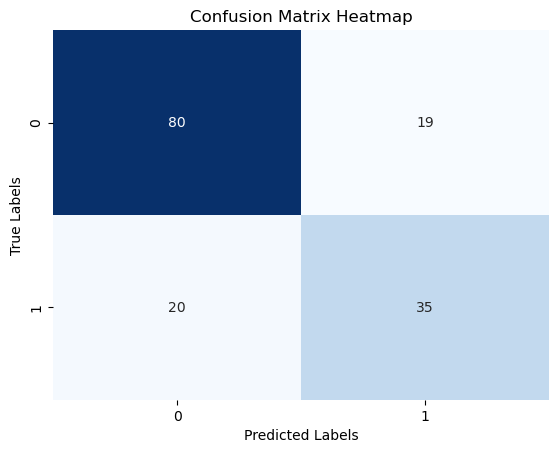

In [25]:
# Visualisasi Confusion Matrix sebagai Heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [26]:
# Fungsi untuk melakukan prediksi berdasarkan input pengguna
def predict_diabetes_outcome(age, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf):
    # Sesuaikan struktur data input sesuai dengan model yang sudah dilatih
    user_input = [[age, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, 0]]  # Tambahkan 0 sebagai placeholder untuk feature yang kurang
    
    # Penskalaan input
    user_input_scaled = scaler.transform(user_input) # type: ignore
    
    # Lakukan prediksi
    prediction = svc_model.predict(user_input_scaled)
    
    return prediction[0]

# Contoh penggunaan fungsi predict_diabetes_outcome
age_input = 30
glucose_input = 120
blood_pressure_input = 80
skin_thickness_input = 25
insulin_input = 90
bmi_input = 28.5
dpf_input = 0.5

result = predict_diabetes_outcome(age_input, glucose_input, blood_pressure_input, skin_thickness_input, insulin_input, bmi_input, dpf_input)

if result == 0:
    print("Tidak terkena diabetes.")
else:
    print("Terkena diabetes.")


Tidak terkena diabetes.


c:\Users\agung\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
